<a href="https://colab.research.google.com/github/GavenDcosta/MalariaDetactionFromCell_Images_ML_Tensorflow/blob/main/MLminiproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from PIL import Image
from tensorflow.keras.utils import plot_model


In [3]:
# Load the Malaria dataset from TensorFlow Datasets
(ds_train, ds_test), ds_info = tfds.load('malaria',
                                         split=['train[:80%]', 'train[80%:]'],
                                         shuffle_files=True,
                                         as_supervised=True,  # Gets (image, label) pairs
                                         with_info=True)

# Display dataset information
print(ds_info)

# Define image parameters
img_height, img_width = 100, 100
batch_size = 32

# Normalize the images and resize them
def preprocess(image, label):
    image = tf.image.resize(image, [img_height, img_width])
    image = image / 255.0  # Normalize pixel values between 0 and 1 (color range 0-255 so divide by 255)
    return image, label

# Apply preprocessing to the datasets
ds_train = ds_train.map(preprocess).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear im

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.7360 - loss: 0.4913 - val_accuracy: 0.9450 - val_loss: 0.1881
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.9516 - loss: 0.1544 - val_accuracy: 0.9550 - val_loss: 0.1530
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9586 - loss: 0.1260 - val_accuracy: 0.9556 - val_loss: 0.1505
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9621 - loss: 0.1089 - val_accuracy: 0.9521 - val_loss: 0.1534
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.9670 - loss: 0.0944 - val_accuracy: 0.9519 - val_loss: 0.1557
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.9736 - loss: 0.0778 - val_accuracy: 0.9494 - val_loss: 0.1721
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.9807 - loss: 0.0630 - val_accuracy: 0.9472 - val_loss: 0.2066
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 38s 32ms/step - accuracy: 0.9856 - loss: 0.0461 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,196,104 (19.82 MB)

 Trainable params: 1,732,034 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,464,070 (13.21 MB)

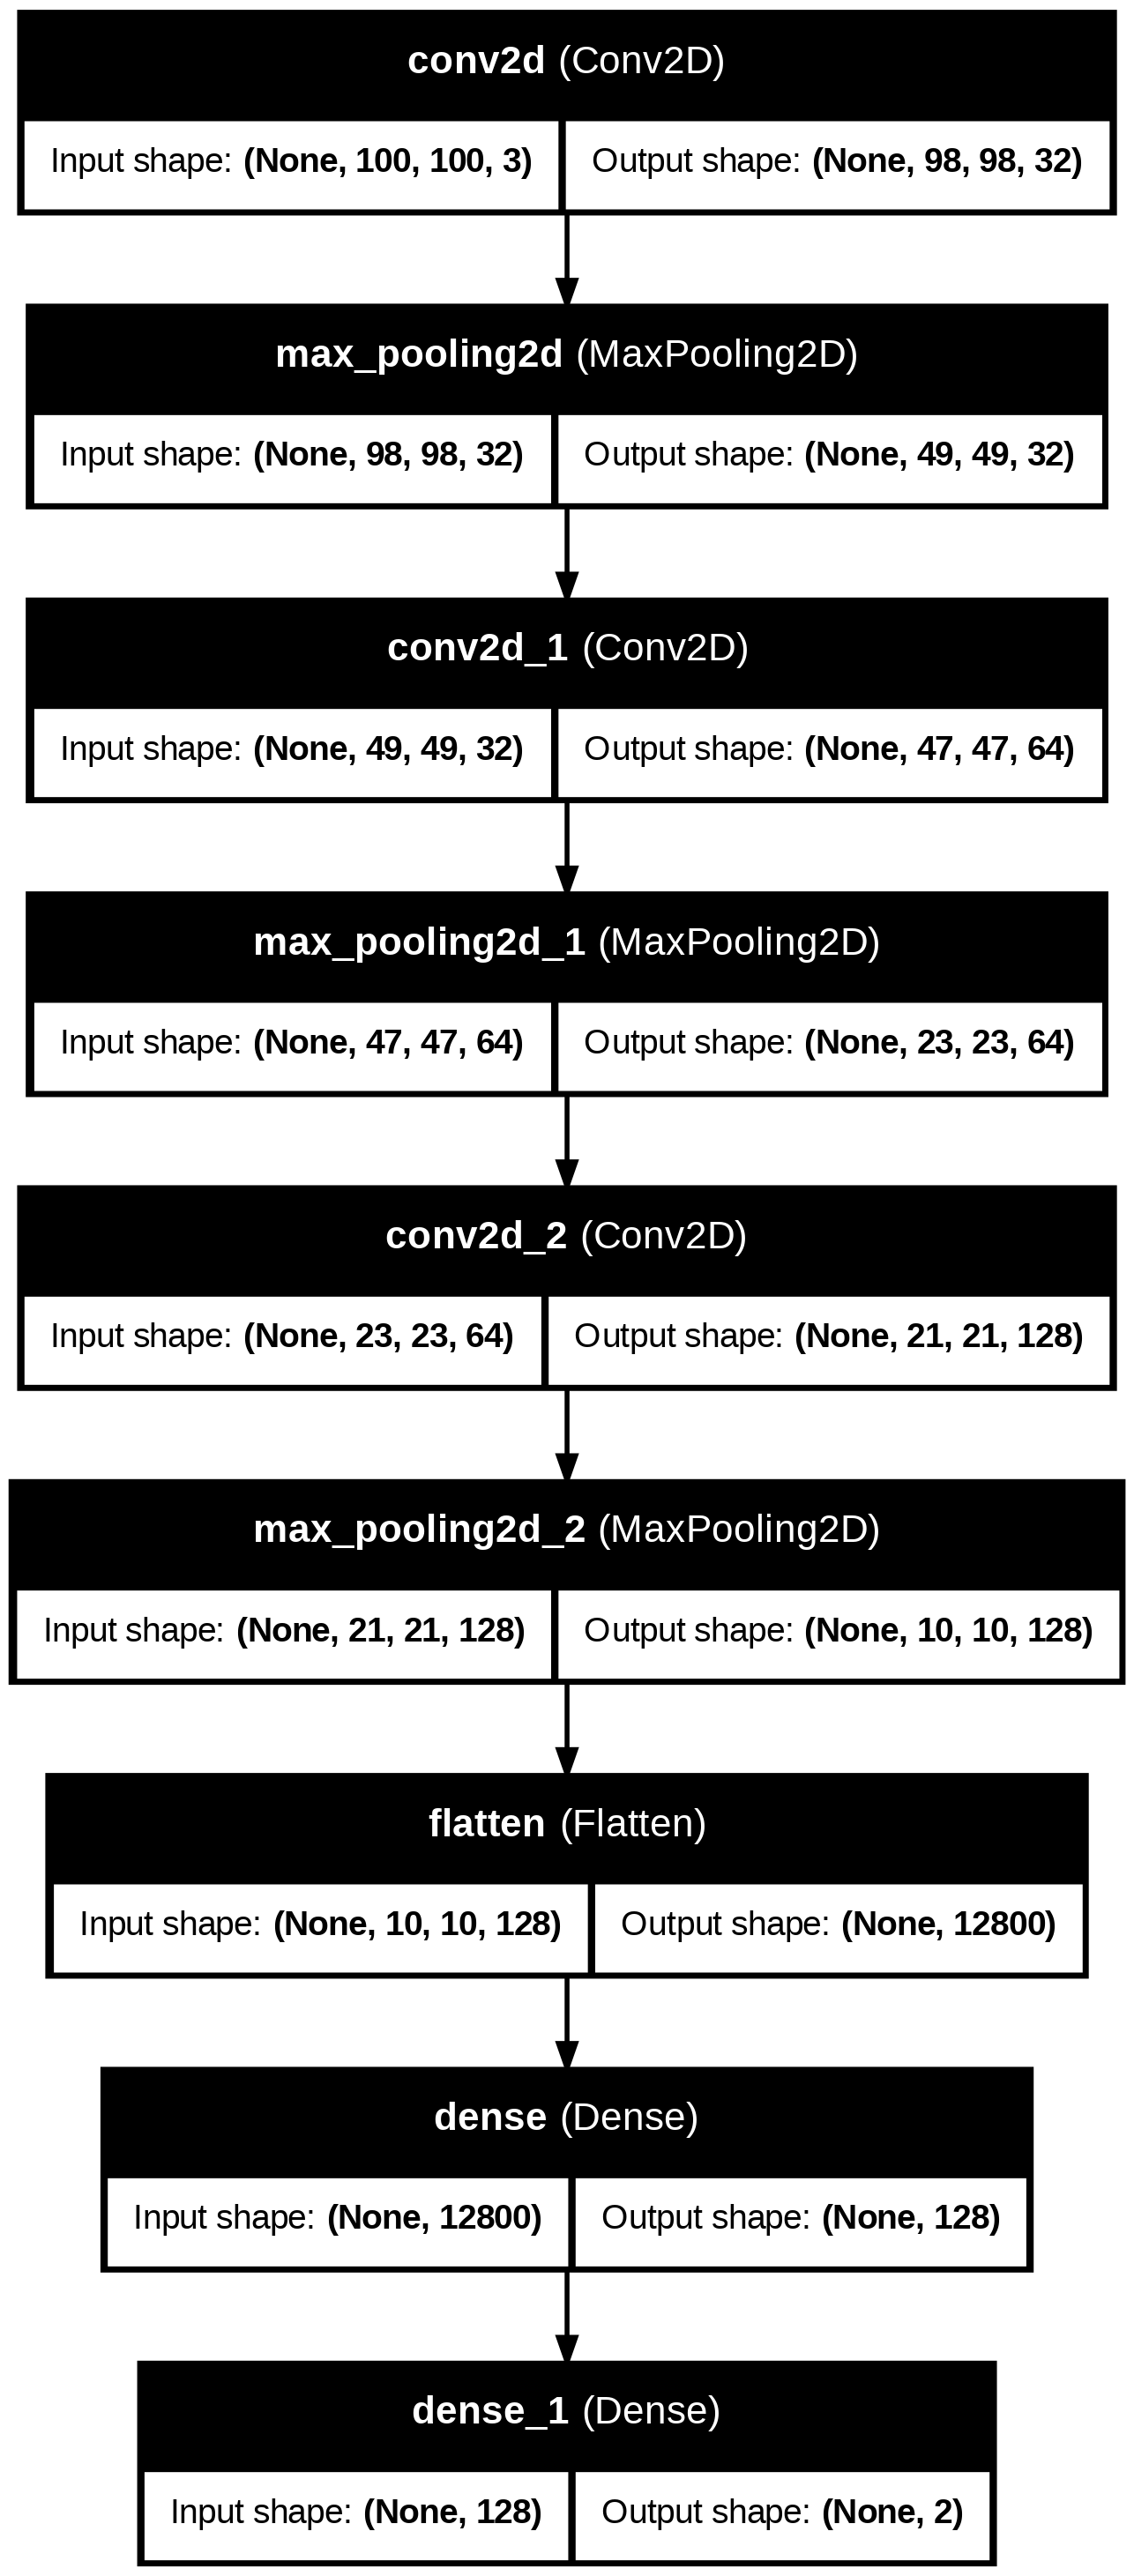

In [4]:
# Build the CNN model
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 classes: Parasitized and Uninfected
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Alternate optimizers:
# - SGD (Stochastic Gradient Descent): Often works well with lower learning rates and is good for convergence.
# - RMSprop: Useful for recurrent neural networks; it adjusts the learning rate based on the average of recent magnitudes of the gradients.
# - Adagrad: Adapts the learning rate based on how frequently a parameter gets updated; can be useful in sparse data scenarios.



# Train the model
history = model.fit(ds_train, validation_data=ds_test, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(ds_test)
print(f'\nTest accuracy: {test_acc}')

model.summary()


# Plot and save the model structure to a file
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)


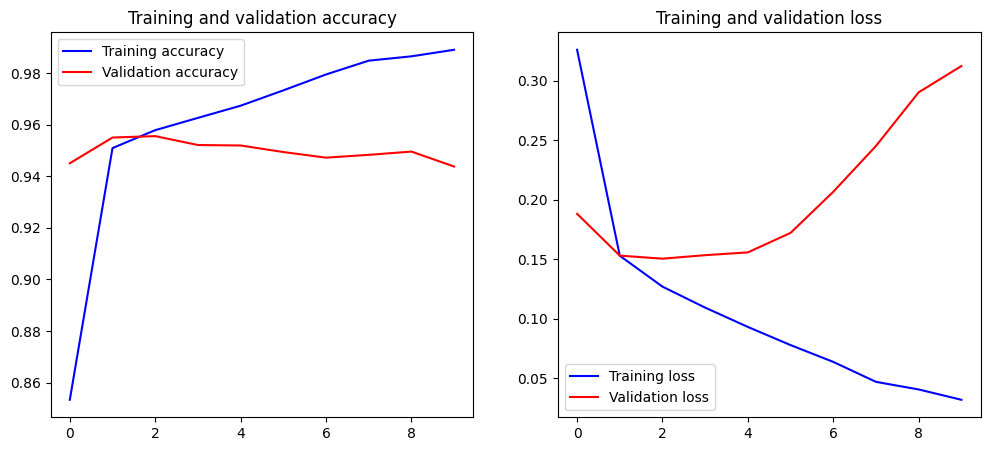

In [5]:
# Function to plot training history
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_history(history)

In [ ]:
# Function to upload and predict
def upload_and_predict(model):
    uploaded = files.upload()
    for filename in uploaded.keys():
        # Load the image
        img = Image.open(filename)
        img = img.resize((img_height, img_width))  # Resize image to match model input shape
        img_array = np.array(img) / 255.0  # Normalize the image
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Predict
        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])

        class_names = ['Parasitized', 'Uninfected']
        predicted_class = class_names[np.argmax(score)]
        confidence = 100 * np.max(score)

        print(f"Predicted Class: {predicted_class} with {confidence:.2f}% confidence.")

# Call the function to upload and predict
upload_and_predict(model)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
# Save the model to your Google Drive
model.save('/content/drive/MyDrive/malaria_model.h5')


In [ ]:
# Save only the weights
model.save_weights('/content/drive/MyDrive/malaria_weights.weights.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━

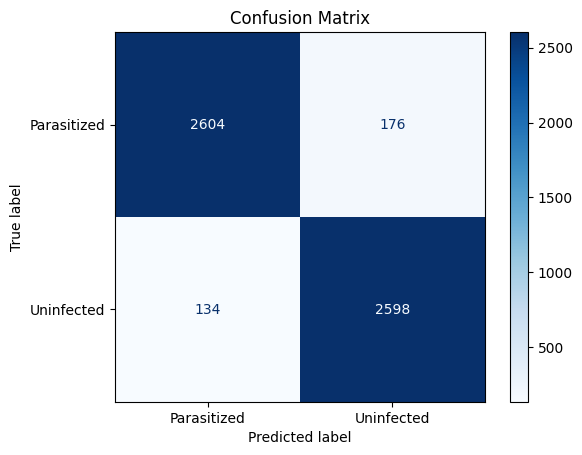

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Generate confusion matrix
def plot_confusion_matrix(model, ds_test):
    y_true = []
    y_pred = []

    for images, labels in ds_test:
        predictions = model.predict(images)
        predicted_classes = np.argmax(predictions, axis=1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted_classes)

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Parasitized', 'Uninfected'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(model, ds_test)